In [1]:
import h5py
import numpy as np
import collections.abc
collections.Iterable = collections.abc.Iterable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astrodendro import Dendrogram

In [2]:
cgs_mp = 9.10938291e-28
cgs_me = 9.10938291e-28 
cgs_xmh =  cgs_mp + cgs_me
yHe = 9.7222222e-2 
mu = (1.e0+4.e0*yHe)*cgs_xmh


In [3]:
def get_data(filename):
  d = {}
  with h5py.File(filename, "r") as data:
    data_list = list(data)
    for ls in data_list:
      d[ls] = data[ls][()]
  return d

In [4]:
d = get_data('C:/Users/kotor/StarGen/datasets/data_ppp/cb2800.h5')

hx = d['space1']
hy = d['space2']
hz = d['space3']

vx = d['vx']
vy = d['vy']
vz = d['vz']

v = np.sqrt(vx**2 + vy**2 + vz**2)
v_ = np.mean(v)
dv = np.sqrt((v - v_)**2)

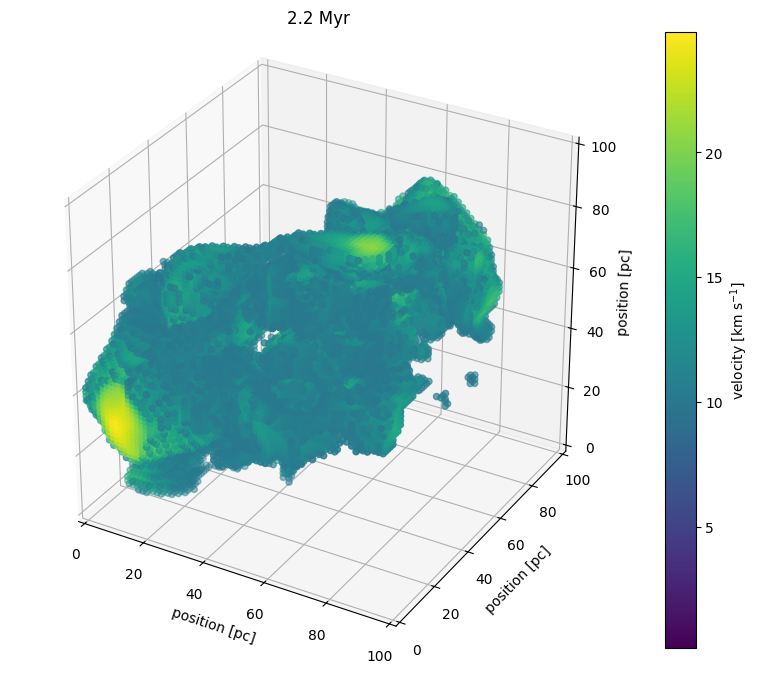

In [13]:
shape = v.shape
gas_density = v.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_density.min(), gas_density.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * hx
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * hy
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * hz

threshold = 10
mask= gas_density > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_density[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('velocity [km s$^{-1}$]')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)


plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("3Dmap_400")

In [6]:
dendro = Dendrogram.compute(v, min_value=15, min_delta=5, min_npix=20)

In [7]:
leaf_indices = [i for i, structure in enumerate(dendro.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)
print(len(leaf_indices))
print(len(branch_indices))

[0, 1]
[]
2
0


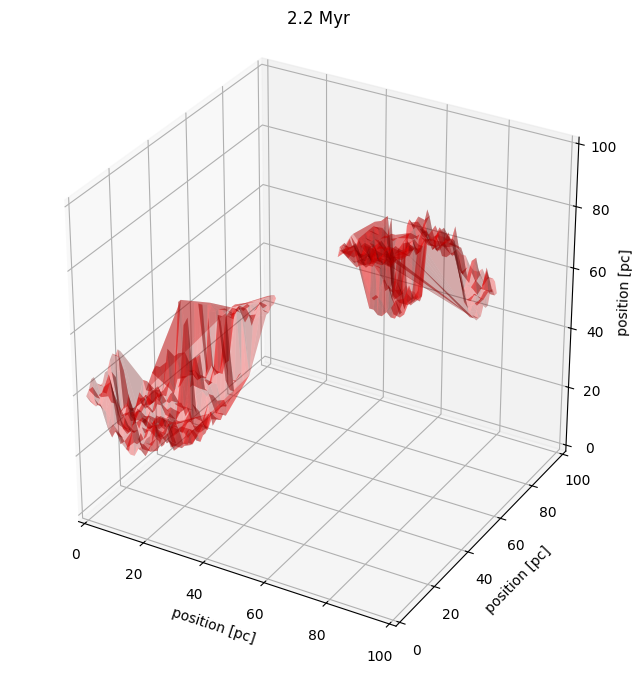

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='red', alpha=0.3)
    
for j, structure_index in enumerate(branch_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='orange', alpha=0.3)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("dendro3D_400_contour")

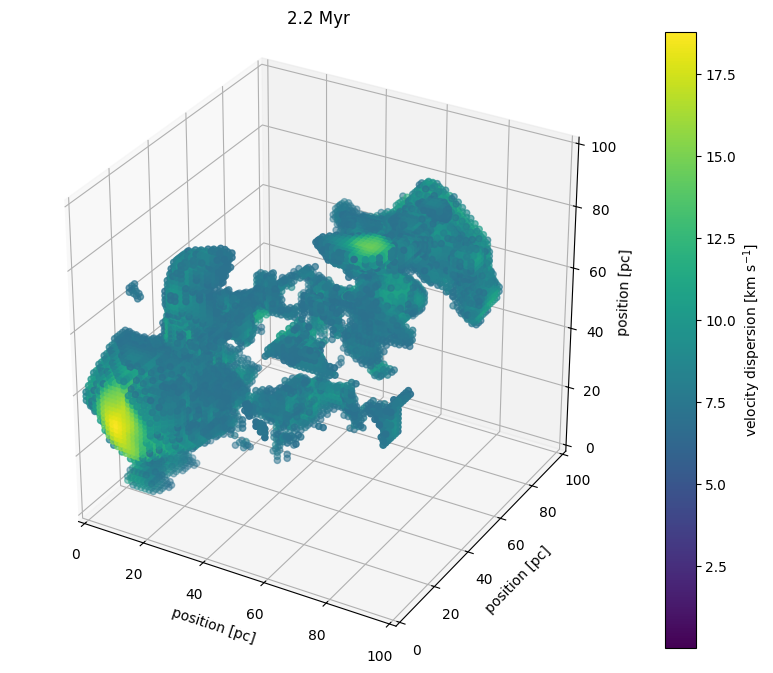

In [9]:
shape = dv.shape
gas_density = dv.reshape(-1)
colormap = plt.get_cmap('viridis')
norm = plt.Normalize(gas_density.min(), gas_density.max())

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

x_coords = np.repeat(np.arange(shape[0]), shape[1]*shape[2]) * hx
y_coords = np.tile(np.repeat(np.arange(shape[1]), shape[2]), shape[0]) * hy
z_coords = np.tile(np.arange(shape[2]), shape[0]*shape[1]) * hz

threshold = 7
mask= gas_density > threshold

x_filtered = x_coords[mask]
y_filtered = y_coords[mask]
z_filtered = z_coords[mask]
gas_mass_filtered = gas_density[mask]

scatter = ax.scatter(x_filtered, y_filtered, z_filtered, c=gas_mass_filtered, cmap=colormap, norm=norm)  

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('velocity dispersion [km s$^{-1}$]')

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)


plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')

#plt.savefig("3Dmap_400")

In [10]:
dendro = Dendrogram.compute(dv, min_value=7, min_delta=5, min_npix=20)

In [11]:
leaf_indices = [i for i, structure in enumerate(dendro.all_structures) if structure.is_leaf]
branch_indices = [j for j, structure in enumerate(dendro.all_structures) if structure.is_branch]

print(leaf_indices)
print(branch_indices)
print(len(leaf_indices))
print(len(branch_indices))

[0, 1, 2, 3, 4, 5]
[]
6
0


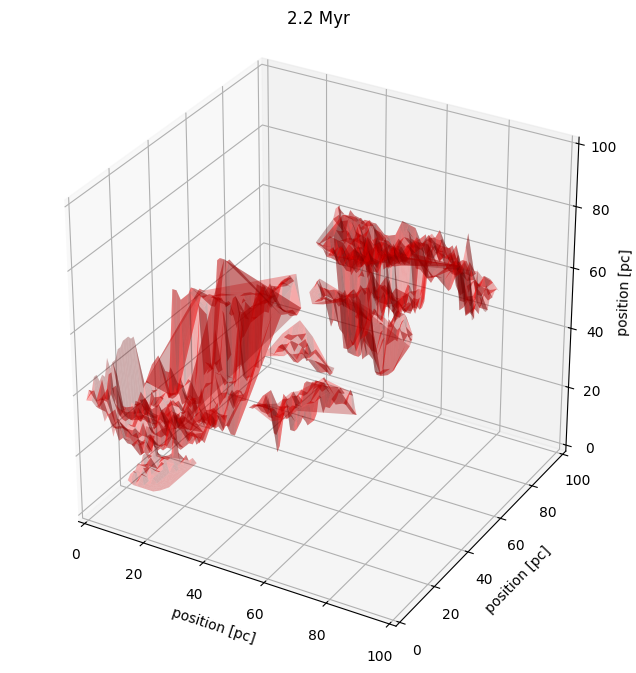

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect((1,1,1))

for i, structure_index in enumerate(leaf_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='red', alpha=0.3)

for j, structure_index in enumerate(branch_indices):
    structure = dendro[structure_index]
    mask = structure.get_mask()
    indices = np.where(mask)
    ax.plot_trisurf(indices[0] * hx, indices[1] * hy, indices[2] * hz, color='orange', alpha=0.3)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)

plt.title("2.2 Myr")

X = ax.set_xlabel('position [pc]')
Y = ax.set_ylabel('position [pc]')
Z = ax.set_zlabel('position [pc]')